### import torch , bumpy and matplot 

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### check gpu

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### import data

In [5]:
temp_x = np.loadtxt("./qsort_qsort.py.csv",dtype=np.float32, delimiter=",")
temp_y = np.loadtxt("qsort_result.txt",dtype=np.float32, delimiter=",")
print(temp_x)
print(temp_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1

### process data 
[>0 => 1, 0 => 0]  


In [6]:
x_train = np.float32(temp_x>0)
y_train = temp_y     

### set size and batch

In [11]:
n_in, n_h, n_out, batch_size = len(x_train[0]), 3, 1, len(x_train)

x_train = torch.tensor(x_train).cuda()
y_train = torch.tensor(y_train).cuda()


/home/hansama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hansama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


### design model,loss function and optimizer

In [12]:
model = nn.Sequential(nn.Linear(n_in,n_h),
                          nn.Sigmoid(),
                          nn.Linear(n_h,n_out),
                          nn.Sigmoid()).cuda()
# loss
criterion = torch.nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,weight_decay = 1e-6)

#### model

In [14]:
model

Sequential(
  (0): Linear(in_features=35, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)

#### loss

In [15]:
criterion

MSELoss()

#### optimizer

In [16]:
optimizer


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 1e-06
)

### save loss for draw plot


In [17]:
loss_list =[]

### train



In [18]:
for i in range(3000):
    # forward prapagation
    y_pred = model(x_train)

    # loss
    loss = criterion(y_pred,y_train)
    loss_list.append(float(loss))

    #print(model.named_parameters())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print('i: ', i, ' loss: ', loss.item())
        

i:  0  loss:  0.23450522124767303
i:  100  loss:  0.22744731605052948
i:  200  loss:  0.22353483736515045
i:  300  loss:  0.22127293050289154
i:  400  loss:  0.21991997957229614
i:  500  loss:  0.21908873319625854
i:  600  loss:  0.2185671627521515
i:  700  loss:  0.21823443472385406
i:  800  loss:  0.21801945567131042
i:  900  loss:  0.2178790271282196
i:  1000  loss:  0.21778661012649536
i:  1100  loss:  0.21772527694702148
i:  1200  loss:  0.21768444776535034
i:  1300  loss:  0.21765708923339844
i:  1400  loss:  0.21763871610164642
i:  1500  loss:  0.21762633323669434
i:  1600  loss:  0.2176179736852646
i:  1700  loss:  0.21761228144168854
i:  1800  loss:  0.2176084667444229
i:  1900  loss:  0.2176058441400528
i:  2000  loss:  0.21760407090187073
i:  2100  loss:  0.21760287880897522
i:  2200  loss:  0.21760202944278717
i:  2300  loss:  0.21760153770446777
i:  2400  loss:  0.21760112047195435
i:  2500  loss:  0.21760082244873047
i:  2600  loss:  0.21760070323944092
i:  2700  loss:  0

### model back to cpu


In [19]:
x_train = x_train.cpu()
model = model.cpu()

### print loss result


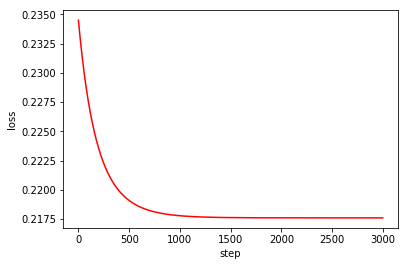

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('step')
plt.ylabel('loss')
plt.plot([i for i in range(3000)], loss_list, c='r')
plt.show()

### get fail line set

In [21]:
s_f = [1]*n_in
for i in range(batch_size):
    if(y_train[i]==1):
        s_f = np.multiply(s_f,x_train[i])
s_f

tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

### test fail line

In [23]:
model.eval()
result = []
for i in range(n_in):
    if(s_f[i]==1):
        test = torch.tensor(np.float32([0]*n_in))
        test[i] = 1
        result.append((i+1,float(model(test)[0])))

sorted_result = sorted(result, key=lambda x: x[1], reverse=True)
[i[0] for i in sorted_result]

[14, 6, 4, 7, 10, 9, 26, 16, 27, 17, 8, 22, 29, 5, 13, 19, 18, 15, 30]